# Partei-Accounts im Vergleich

In [1]:
library("httr")
library("jsonlite")
library("ggplot2")
library('dplyr', warn.conflicts = FALSE)

## Ids der Org-Enititäten sammeln, die zu den Parteien gehören

In [2]:
# URLs für Abfragen vorbereiten
base <- "http://mediamonitoring.gesis.org/api/organizations/"
url_all <- paste(base,"all/", sep="")
url_tweets <- paste(base, "twitter/tweets_by/organizations/", sep="")
url_replies <- paste(base, "twitter/replies_to/organizations/", sep="")

In [3]:
# Parameter für Subsetting des DF
party1 = 'afd'  # --> subcategory
party2 = 'linke'
party3 = 'grüne'
party_list <- list(party1,party2,party3)

# Parameter für eigentliche Datenabfrage
params = list(
    from_date='2017-01-01',
    to_date='2019-12-01',
    aggregate_by='month'
)

In [4]:
# Liste aller Organisationen in unserer Datenbank
orgs <- as.data.frame(fromJSON(content(GET(url_all), "text", encoding="UTF-8"), flatten = TRUE))

#Subsetting für bestimmte Parteien
party_accs1 <- orgs[orgs$subcategory == party1  & !is.null(orgs$tw_ids),]$organization_id
party_accs2 <- orgs[orgs$subcategory == party2  & !is.null(orgs$tw_ids),]$organization_id
party_accs3 <- orgs[orgs$subcategory == party3  & !is.null(orgs$tw_ids),]$organization_id

## Alle Tweets sammeln, pro Partei

In [5]:
# Tweets abrufen pro Accountsammlung jeder Partei

# Alle Accounts einer Partei erzeugen je einen DF, diesen werden wir an jeweils eine Partei-Liste anhängen
tweets_party1 <- data.frame()
tweets_party2 <- data.frame()
tweets_party3 <- data.frame()

# Tweets von der ersten Partei
for (organization_id in party_accs1) {
    json_tweets <- fromJSON(content(GET(paste(url_tweets, organization_id, "/?", sep=""),query=params), "text", encoding="UTF-8"), flatten = TRUE)
    if (length(json_tweets$values) != 0) {
        tweets_party1 <- rbind(tweets_party1, as.data.frame(json_tweets))        
    }
}
tweets_party1[['party']] <- party1

#  Tweets von der zweiten Partei
for (organization_id in party_accs2) {
    json_tweets <- fromJSON(content(GET(paste(url_tweets, organization_id, "/?", sep=""),query=params), "text", encoding="UTF-8"), flatten = TRUE)
    if (length(json_tweets$values) != 0) {
        tweets_party2 <- rbind(tweets_party2, as.data.frame(json_tweets))        
    }
}
tweets_party2[['party']] <- party2

#  Tweets von der dritten Partei
for (organization_id in party_accs3) {
    json_tweets <- fromJSON(content(GET(paste(url_tweets, organization_id, "/?", sep=""),query=params), "text", encoding="UTF-8"), flatten = TRUE)
    if (length(json_tweets$values) != 0) {
        tweets_party3 <- rbind(tweets_party3, as.data.frame(json_tweets))        
    }
}
tweets_party3[['party']] <- party3


#Zusammenkleben der drei Partei-DFs
all_tweets <- rbind(tweets_party1, tweets_party2, tweets_party3)

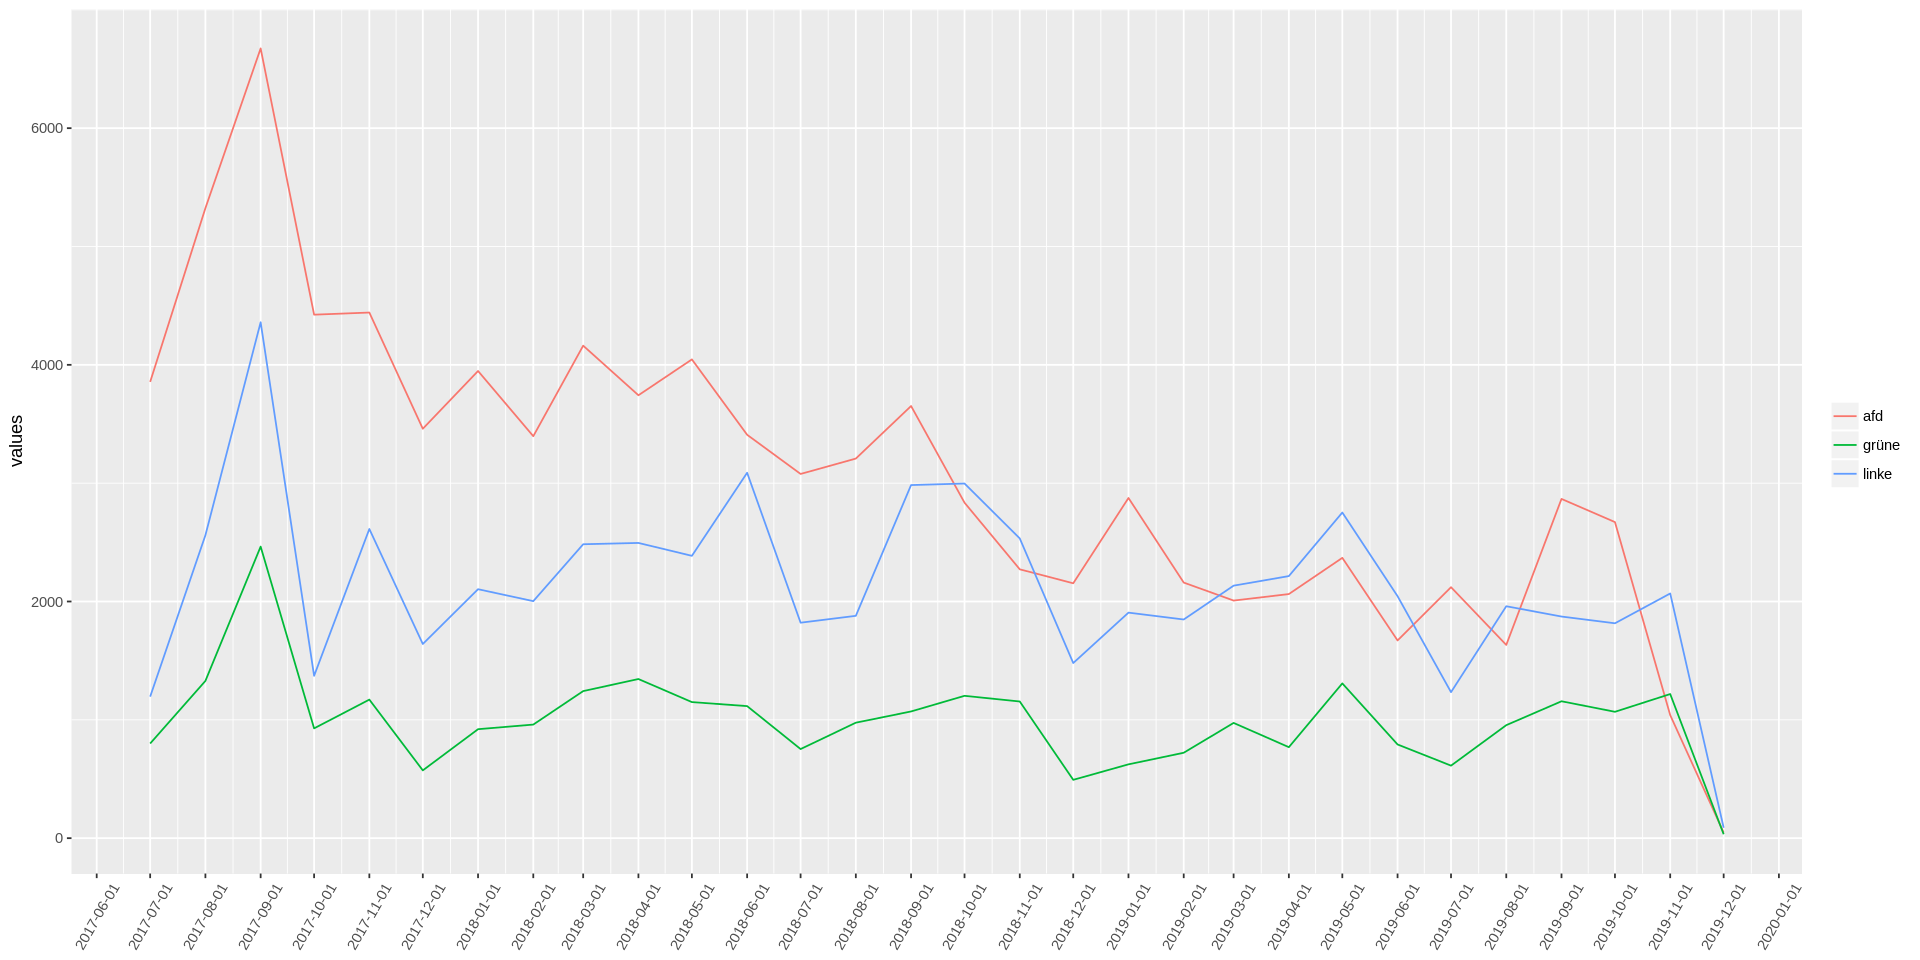

In [7]:
options(repr.plot.width=16, repr.plot.height=8)

# Plotting tweets 
ggplot(data=all_tweets, aes(x=as.Date(labels), y=values)) + stat_summary(fun.y = sum, geom="line", aes(colour = party)) +
    theme(axis.text.x = element_text( angle = 60, hjust = 0.5, vjust = 0.5),
    axis.title.x = element_blank(), legend.title = element_blank()) +
    scale_x_date(date_breaks = "1 month") 

## Alle Reaktionen sammeln, pro Partei

In [10]:
# Retrieve the replies for each organization 

# Prepare data frames for each party
replies_party1 <- data.frame()
replies_party2 <- data.frame()
replies_party3 <- data.frame()

# Get tweets from party1 (afd)
for (organization_id in party_accs1) {
    json_tweets <- fromJSON(content(GET(paste(url_replies, organization_id, "/?", sep=""),query=params), "text", encoding="UTF-8"), flatten = TRUE)
    if (length(json_tweets$values) != 0) {
        replies_party1 <- rbind(replies_party1, as.data.frame(json_tweets))        
    }
}
replies_party1[['party']] <- party1

# Get tweets from party2 (linke)
for (organization_id in party_accs2) {
    json_tweets <- fromJSON(content(GET(paste(url_replies, organization_id, "/?", sep=""),query=params), "text", encoding="UTF-8"), flatten = TRUE)
    if (length(json_tweets$values) != 0) {
        replies_party2 <- rbind(replies_party2, as.data.frame(json_tweets))        
    }
}
replies_party2[['party']] <- party2

# Get tweets from party3 (grüne)
for (organization_id in party_accs3) {
    json_tweets <- fromJSON(content(GET(paste(url_replies, organization_id, "/?", sep=""),query=params), "text", encoding="UTF-8"), flatten = TRUE)
    if (length(json_tweets$values) != 0) {
        replies_party3 <- rbind(replies_party3, as.data.frame(json_tweets))        
    }
}
replies_party3[['party']] <- party3

all_replies <- rbind(replies_party1, replies_party2, replies_party3)

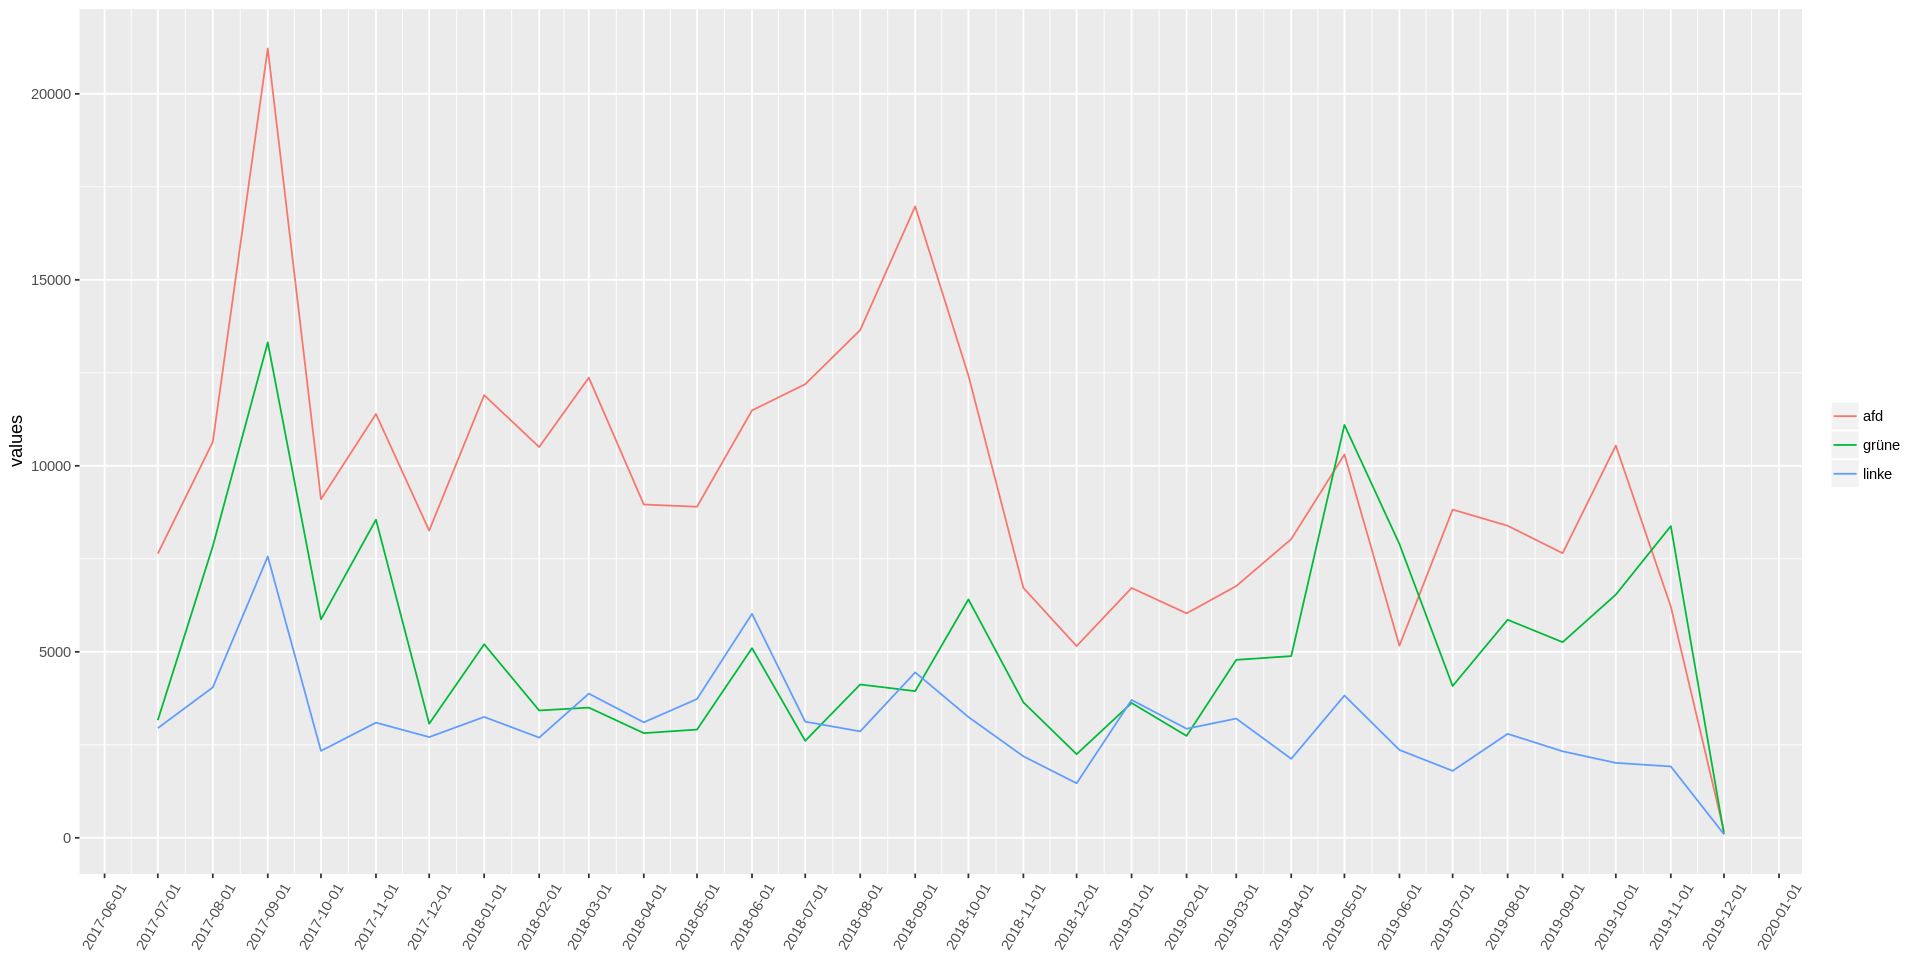

In [11]:
# plotting replies 
options(repr.plot.width=16, repr.plot.height=8)
ggplot(data=all_replies, aes(x=as.Date(labels), y=values)) + stat_summary(fun.y = sum, geom="line", aes(colour = party)) +

    #geom_point(aes(colour = factor(party))) + 
    theme(axis.text.x = element_text( angle = 60, hjust = 0.5, vjust = 0.5),
        axis.title.x = element_blank(), legend.title = element_blank()) +
    scale_x_date(date_breaks = "1 month") 

# Und nun: Tweets und Reaktionen mit WdbB

In [11]:
wdbb <- paste(readLines("WdbB_short.txt"))
#wdbb <- 'Abendland|Abschiebeverhinderungsindustrie|Ahu!|Altmedien|Antifa|"Antifa e.V."|Asylant|Asylforderer|Asylindustrie|Asylkritik|Bahnhofsklatscher|"BRD GmbH"|Bürgerwehr|christlich-jüdisch|"Cui bono?"|"Danke, Merkel!"|"deutsche Frau"|"Deutschland GmbH"|"direkte Demokratie"|Entvölkerung|Ficki-Ficki-Fachkräfte|"Flüchtling I"|"Flüchtling II"|Flüchtlingskrise|Flüchtlingslawine|Flüchtlingswelle|"fremd im eigenen Land"|Frieden|Frühsexualisierung|Genderwahn|GEZ|"großer Austausch"|Gummimuschi|Gutmensch|Heimat|Identität|Invasionsarmee|Islamisierung|Islamkritik|Klartext|"kleiner Mann"|Kulturbereicherer|Kulturkreis|Lindwurm|linksversift|linksversifft|Lügenpresse|Maasmännchen|Manipulation|Männerhorden|Maulkorb|Mausrutscher|Merkeldiktatur|Merkeljugend|Minderheitenterror|Multikulti|Nazikeule|Neger|Obergrenze|passdeutsch|Patriotismus|Plünderung|Plüschpimmel|"Political Correctness"|prorussisch|Rapefugees|Rasse|Rassismus|Rechtsstaat|Reconquista|Scharia|Schießbefehl|Schreikinder|Schuldkult|Sexismus|Smartphone|Straßenkampf|Südländer|Systemling|Tabubruch|Thymos|Toleranzfaschismus|Überfremdung|Umerziehung|Umvolkung|"Untergang des Abendlandes"|Verschwulung|völkisch|Volksgemeinschaft|Volkstod|Volksverdünner|Volksverräter|Wirtschaftsflüchtling|Zigeunerschnitzel|Zionisten'

Warning message in readLines("WdbB_short.txt"):
“incomplete final line found on 'WdbB_short.txt'”


In [12]:
# prepare urls
base <- "http://mediamonitoring.gesis.org/api/organizations/"
url_tweets <- paste(base, "twitter/tweets_by/organizations/", sep="")
url_replies <- paste(base, "twitter/replies_to/organizations/", sep="")

# prepare NEW parameters (with text_contains)
params = list(
    from_date='2017-01-01',
    to_date='2019-12-01',
    aggregate_by='month',
    text_contains=wdbb
)

## Tweets WdbB

In [13]:
# Retrieve the tweets for each organization that contain the selected words/topics

# Prepare data frames for each party
tweets_party1 <- data.frame()
tweets_party2 <- data.frame()
tweets_party3 <- data.frame()

# Get tweets from party1 (afd)
for (organization_id in party_accs1) {
    json_tweets <- fromJSON(content(GET(paste(url_tweets, organization_id, "/?", sep=""),query=params), "text", encoding="UTF-8"), flatten = TRUE)
    if (length(json_tweets$values) != 0) {
        tweets_party1 <- rbind(tweets_party1, as.data.frame(json_tweets))        
    }
}
tweets_party1[['party']] <- party1

# Get tweets from party2 (linke)
for (organization_id in party_accs2) {
    json_tweets <- fromJSON(content(GET(paste(url_tweets, organization_id, "/?", sep=""),query=params), "text", encoding="UTF-8"), flatten = TRUE)
    if (length(json_tweets$values) != 0) {
        tweets_party2 <- rbind(tweets_party2, as.data.frame(json_tweets))        
    }
}
tweets_party2[['party']] <- party2

# Get tweets from party3 (grüne)
for (organization_id in party_accs3) {
    json_tweets <- fromJSON(content(GET(paste(url_tweets, organization_id, "/?", sep=""),query=params), "text", encoding="UTF-8"), flatten = TRUE)
    if (length(json_tweets$values) != 0) {
        tweets_party3 <- rbind(tweets_party3, as.data.frame(json_tweets))        
    }
}
tweets_party3[['party']] <- party3

all_tweets_wdbb <- rbind(tweets_party1, tweets_party2, tweets_party3)

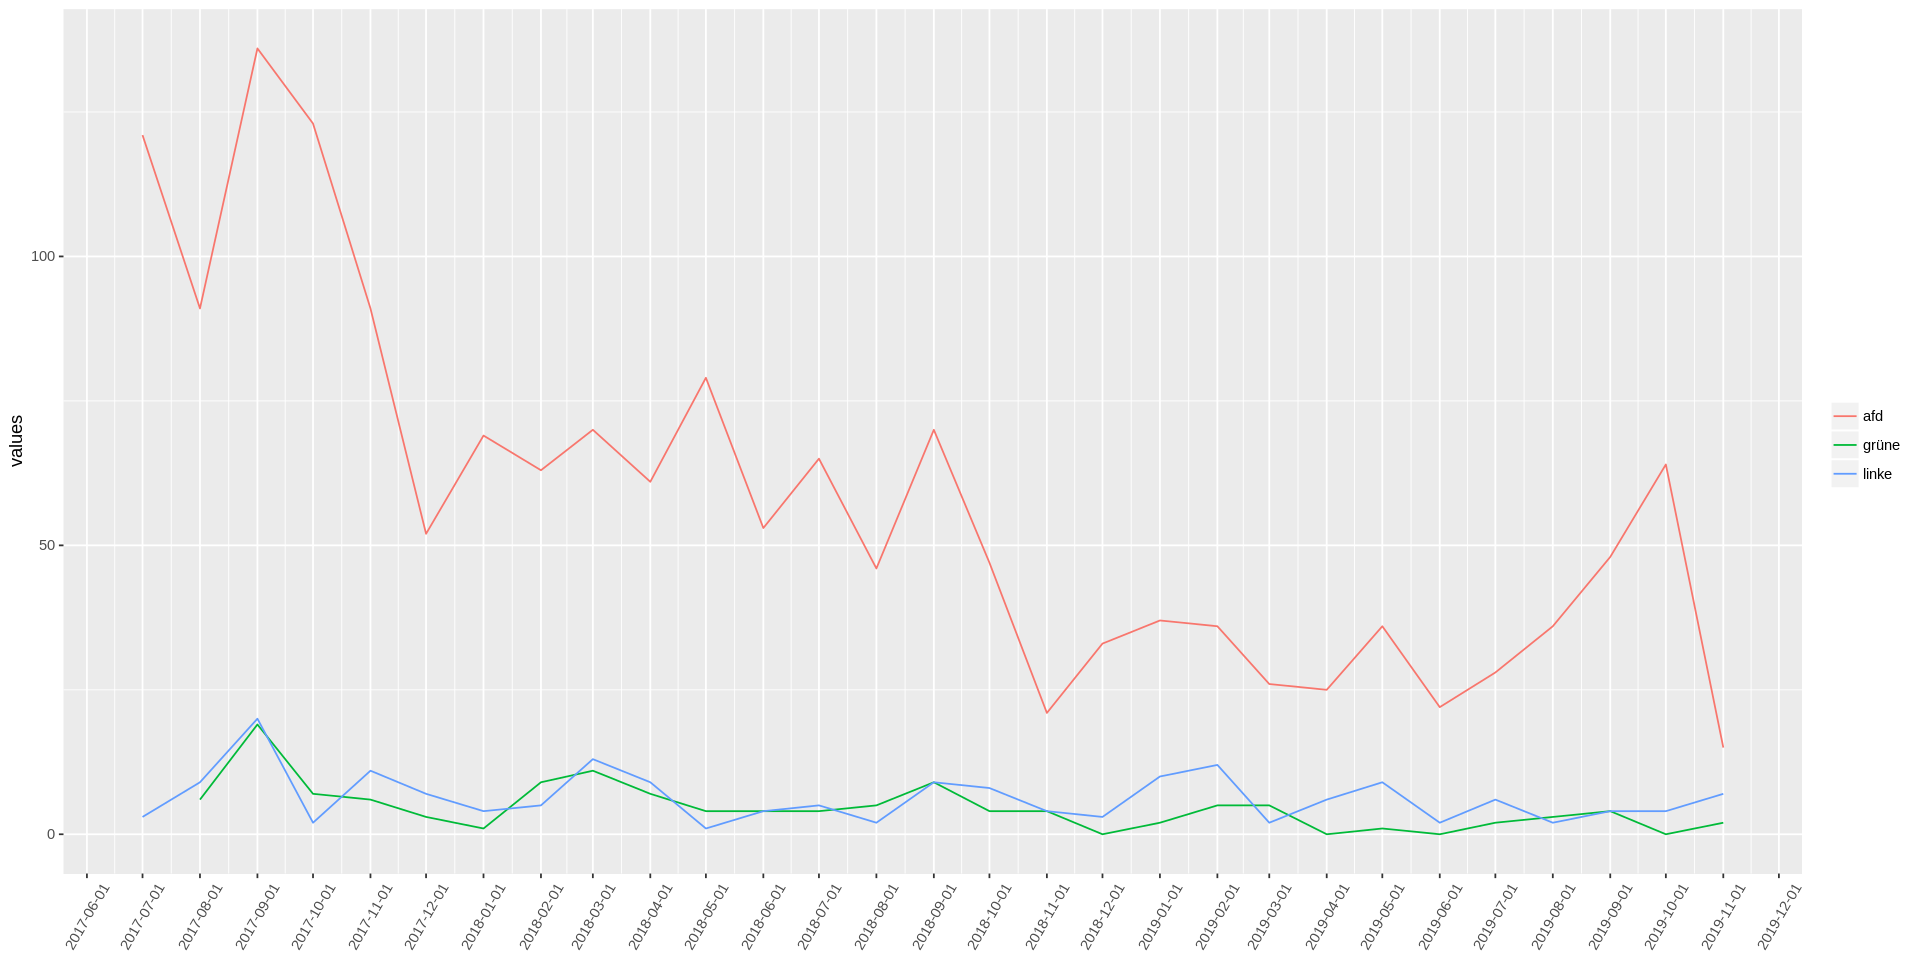

In [14]:
library("ggplot2")
options(repr.plot.width=16, repr.plot.height=8)

# plotting tweets 
ggplot(data=all_tweets_wdbb, aes(x=as.Date(labels), y=values)) + stat_summary(fun.y = sum, geom="line", aes(colour = party)) +

    #geom_point(aes(colour = factor(party))) + 
    theme(axis.text.x = element_text( angle = 60, hjust = 0.5, vjust = 0.5),
        axis.title.x = element_blank(), legend.title = element_blank()) +
    scale_x_date(date_breaks = "1 month") 

## Reaktionen WdbB

In [15]:
# Retrieve the replies for each organization that contain the selected words/topics

# Prepare data frames for each party
replies_party1 <- data.frame()
replies_party2 <- data.frame()
replies_party3 <- data.frame()

# Get tweets from party1 (afd)
for (organization_id in party_accs1) {
    json_tweets <- fromJSON(content(GET(paste(url_replies, organization_id, "/?", sep=""),query=params), "text", encoding="UTF-8"), flatten = TRUE)
    if (length(json_tweets$values) != 0) {
        replies_party1 <- rbind(replies_party1, as.data.frame(json_tweets))        
    }
}
replies_party1[['party']] <- party1

# Get tweets from party2 (linke)
for (organization_id in party_accs2) {
    json_tweets <- fromJSON(content(GET(paste(url_replies, organization_id, "/?", sep=""),query=params), "text", encoding="UTF-8"), flatten = TRUE)
    if (length(json_tweets$values) != 0) {
        replies_party2 <- rbind(replies_party2, as.data.frame(json_tweets))        
    }
}
replies_party2[['party']] <- party2

# Get tweets from party3 (grüne)
for (organization_id in party_accs3) {
    json_tweets <- fromJSON(content(GET(paste(url_replies, organization_id, "/?", sep=""),query=params), "text", encoding="UTF-8"), flatten = TRUE)
    if (length(json_tweets$values) != 0) {
        replies_party3 <- rbind(replies_party3, as.data.frame(json_tweets))        
    }
}
replies_party3[['party']] <- party3

all_replies_wdbb <- rbind(replies_party1, replies_party2, replies_party3)

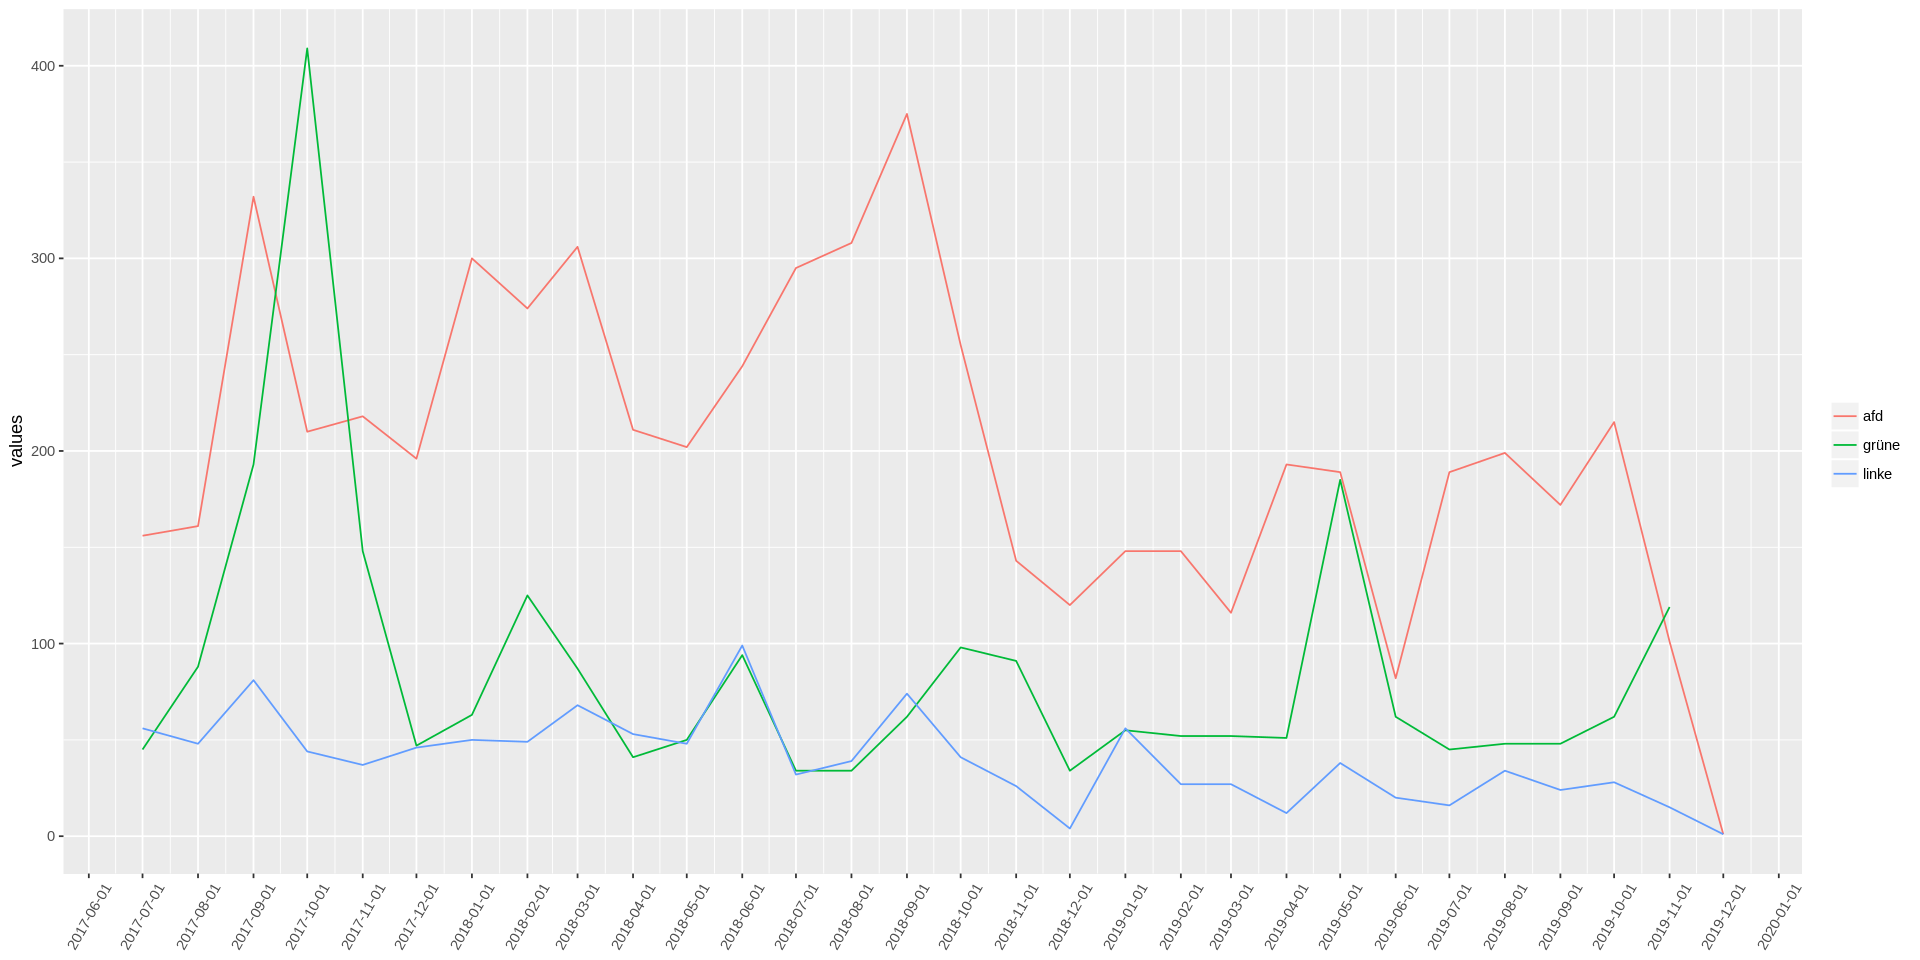

In [16]:
# plotting replies 
options(repr.plot.width=16, repr.plot.height=8)
ggplot(data=all_replies_wdbb, aes(x=as.Date(labels), y=values)) + stat_summary(fun.y = sum, geom="line", aes(colour = party)) +

    #geom_point(aes(colour = factor(party))) + 
    theme(axis.text.x = element_text( angle = 60, hjust = 0.5, vjust = 0.5),
        axis.title.x = element_blank(), legend.title = element_blank()) +
    scale_x_date(date_breaks = "1 month") 